In this notebook, we investigate the on- and off-resonance behaviour of a simple model to discuss NMR. We consider an individual spin-1/2 particle in a strong static magnetic field along the z-axis. We then apply a magnetic pulse that is rotating with frequency $\omega_{ref}$ in the x-y plane. The length of the pulse is chosen such that if the Larmor frequence were exactly equal to $\omega_{ref}$, the time evolution operator in the rotating frame would be exactly exchanging the states $|0\rangle$ and $|1 \rangle$. Thus the transition probability for the transition from $|0 \rangle$ to $|1 \rangle$ is exactly one.

We can then calculate how the transition probability changes when we move away from the resonance frequency, i.e. if there is a difference between the Larmor frequency $\omega$ and the frequency $\omega_{ref}$ at which the field rotates. A short calculation in the rotating frame shows that this transition probability is given by
$$
P(|0 \rangle \rightarrow |1 \rangle) = | \langle 0 | e^{-\frac{u}{\hbar} \widetilde{H} \tau} | 1 \rangle |^2 = \frac{1}{1+\lambda^2} \sin^2 \big[ \frac{\pi}{2}  \sqrt{1+\lambda^2} \big] 
$$
where $\lambda$ is the ratio
$$
\lambda = \frac{\omega - \omega_{ref}}{\gamma B}
$$
Here $\gamma$ is the gyromagnetic factor and $B$ is the amplitude of the remaining field. Let us plot this as a function of $\lambda$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants

In [2]:
###############################
# Transition probability      #
###############################
def p(l):
    x = 1+l**2
    return 1/x * np.sin(np.pi*0.5*np.sqrt(x))

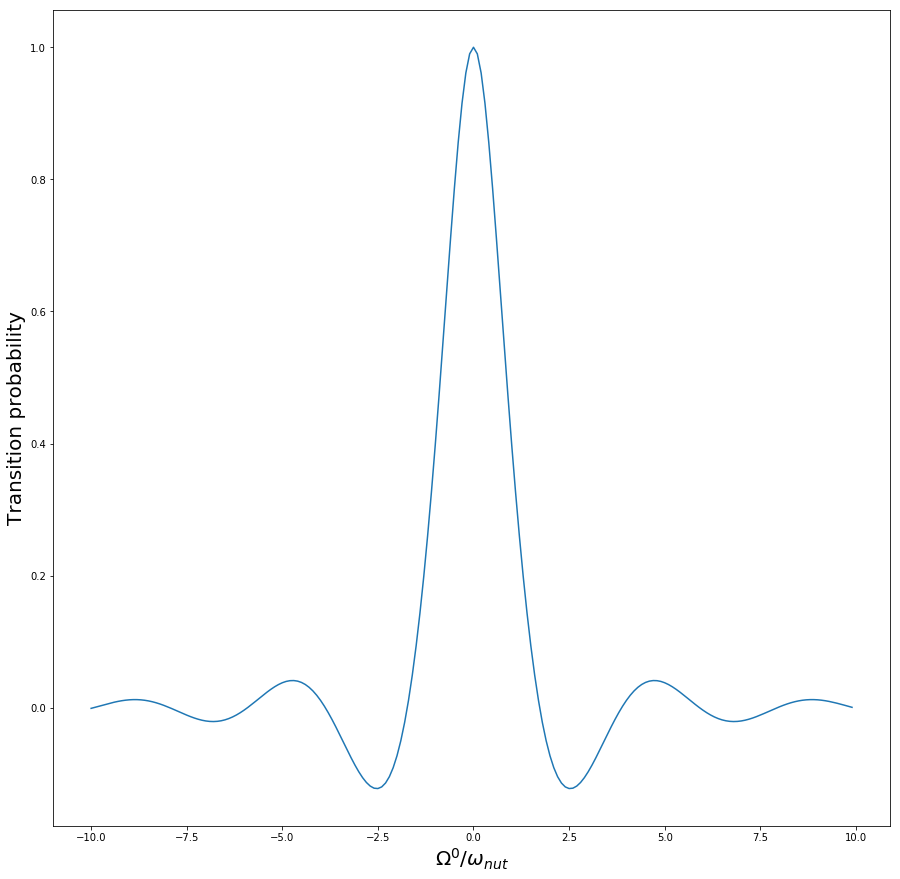

In [3]:
# 
# Plot this
#
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
R = np.arange(-10,10,0.1)
ax.plot(R, p(R))
ax.set_ylabel("Transition probability",fontsize=20)
ax.set_xlabel("$\Omega^0 / \omega_{nut}$", fontsize=20)
plt.show()

Let us now do a few calculations to find the magnitude of the signal caused by an NMR experiment. We will need a few constants for this. The gyromagnetic ratio for a proton is (source: Wikipedia - https://en.wikipedia.org/wiki/Gyromagnetic_ratio#For_a_nucleus or Levitt, page 12)

$\gamma = 267.522 \cdot 10^6$ rad $s^{-1}$ / T

Following Levitt, section 11.3, let us assume a magnetic field $B$ of 11.74 Tesla

In [4]:
gamma = 267.522*10**6
B = 11.74

We can now calculate the Larmor frequency, which is the product $\omega = \gamma B$.

In [5]:
omega = gamma * B
omega / (2*np.pi)

499859247.5716445

The energy associated with this frequency, i.e. the split of the energy levels given by the field, is $\hbar \omega$

In [6]:
scipy.constants.hbar * omega

3.3121023845514164e-25

Now let us compare this to the thermal energy. Assume room temperature, i.e. T = 300 K. Let us compute kT for this temperature

In [7]:
T = 300
scipy.constants.k*T

4.141945559999999e-21

Let us call the ratio between these two energies $\beta$

In [8]:
beta = omega*scipy.constants.hbar /(T*scipy.constants.k)
beta

7.996489419217324e-05

Now let us calculate the strength of the magnetic field at a point in the x-y plane at distance d from the probe in the thermal equilibrium state. This is given by
$$
N \frac{\mu_0}{4\pi} \frac{\gamma \beta \hbar}{4d^3}
$$
where 
$$
\beta =  \frac{\hbar \gamma B}{kT}
$$
as before, and N is the number of nuclei in the probe. We will assume $N = N_A$, i.e. we assume one mol of substance.

In [9]:
d = 0.1
M = scipy.constants.Avogadro*scipy.constants.mu_0*0.25/np.pi * gamma * beta * scipy.constants.hbar / (4*d**3)
M

3.3964555979991094e-11

This is a very weak magnetic field, many orders of magnitude smaller than the magnetic field of the earth which is in the order of $10^{-5}$ Tesla. Now assume that we have applied an RF pulse to turn the net magnetic moment into the y-axis. In the laboratory frame, this will result in a rapidly oscillating magnetic field. If we place a coil with n turns in the x-y-plane at distance $d$ from the probe, and let $A$ denote the area of the coil, then the voltage induced in the coil is given by
$$
\big[ N \frac{\mu_0}{4\pi} \frac{1}{d^3}  \frac{\gamma \beta \hbar}{4} \big]  2 A \omega  n
$$
The term in the parentheses is the number $M$ that we have just calculated. Let us now assume that the area of the coil is one square centimeter and that we have $n = 10$ turns, and let us calculate the voltage.

In [11]:
n = 10
A = 10**(-4)
M * 2 * A * omega * n

0.0002133455243857631